In [1]:
# ============================================================================
# NOTEBOOK 3: EXPLORATORY DATA ANALYSIS & SALES ANALYSIS
# Purpose: Deep dive into sales patterns, trends, and business insights
# ============================================================================

# Cell 1: Import Libraries & Load Master Dataset
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11

print("📂 Loading master dataset...")
master_df = pd.read_csv('master_dataset.csv')

# Convert date columns back to datetime
date_cols = ['order_purchase_timestamp', 'order_approved_at', 
             'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date', 'review_creation_date']

for col in date_cols:
    if col in master_df.columns:
        master_df[col] = pd.to_datetime(master_df[col], errors='coerce')

print(f"✅ Master dataset loaded: {len(master_df):,} rows × {len(master_df.columns)} columns")
print(f"📅 Date range: {master_df['order_purchase_timestamp'].min().date()} to {master_df['order_purchase_timestamp'].max().date()}")

📂 Loading master dataset...
✅ Master dataset loaded: 110,189 rows × 47 columns
📅 Date range: 2016-09-15 to 2018-08-29


In [2]:
# Cell 2: Create Order-Level Summary Dataset
# ============================================================================
print("="*70)
print("📊 CREATING ORDER-LEVEL SUMMARY")
print("="*70)

# Aggregate to order level
order_summary = master_df.groupby('order_id').agg({
    'customer_id': 'first',
    'order_status': 'first',
    'order_purchase_timestamp': 'first',
    'order_delivered_customer_date': 'first',
    'customer_city': 'first',
    'customer_state': 'first',
    'price': 'sum',
    'freight_value': 'sum',
    'payment_value': 'first',
    'payment_type': 'first',
    'payment_installments': 'first',
    'review_score': 'first',
    'delivery_days': 'first',
    'delivery_delay_days': 'first',
    'delivered_on_time': 'first',
    'order_year': 'first',
    'order_month': 'first',
    'order_month_name': 'first',
    'order_dayofweek': 'first',
    'order_day_name': 'first',
    'order_hour': 'first',
    'is_weekend': 'first',
    'order_item_id': 'count'  # Number of items per order
}).reset_index()

order_summary.rename(columns={'order_item_id': 'items_count'}, inplace=True)

print(f"✅ Order summary created: {len(order_summary):,} unique orders")
print(f"\n📊 Average items per order: {order_summary['items_count'].mean():.2f}")
print(f"💰 Average order value: R$ {order_summary['payment_value'].mean():.2f}")

📊 CREATING ORDER-LEVEL SUMMARY
✅ Order summary created: 96,470 unique orders

📊 Average items per order: 1.14
💰 Average order value: R$ 159.86


In [3]:
# Cell 2: Create Order-Level Summary Dataset
# ============================================================================
print("="*70)
print("📊 CREATING ORDER-LEVEL SUMMARY")
print("="*70)

# Aggregate to order level
order_summary = master_df.groupby('order_id').agg({
    'customer_id': 'first',
    'order_status': 'first',
    'order_purchase_timestamp': 'first',
    'order_delivered_customer_date': 'first',
    'customer_city': 'first',
    'customer_state': 'first',
    'price': 'sum',
    'freight_value': 'sum',
    'payment_value': 'first',
    'payment_type': 'first',
    'payment_installments': 'first',
    'review_score': 'first',
    'delivery_days': 'first',
    'delivery_delay_days': 'first',
    'delivered_on_time': 'first',
    'order_year': 'first',
    'order_month': 'first',
    'order_month_name': 'first',
    'order_dayofweek': 'first',
    'order_day_name': 'first',
    'order_hour': 'first',
    'is_weekend': 'first',
    'order_item_id': 'count'  # Number of items per order
}).reset_index()

order_summary.rename(columns={'order_item_id': 'items_count'}, inplace=True)

print(f"✅ Order summary created: {len(order_summary):,} unique orders")
print(f"\n📊 Average items per order: {order_summary['items_count'].mean():.2f}")
print(f"💰 Average order value: R$ {order_summary['payment_value'].mean():.2f}")

📊 CREATING ORDER-LEVEL SUMMARY
✅ Order summary created: 96,470 unique orders

📊 Average items per order: 1.14
💰 Average order value: R$ 159.86


In [4]:
# Cell 3: Overall Business Metrics
# ============================================================================
print("\n" + "="*70)
print("📈 OVERALL BUSINESS METRICS")
print("="*70)

total_revenue = order_summary['payment_value'].sum()
total_orders = len(order_summary)
total_customers = order_summary['customer_id'].nunique()
avg_order_value = order_summary['payment_value'].mean()
total_items_sold = master_df['order_item_id'].count()

print(f"\n💰 FINANCIAL METRICS:")
print(f"   Total Revenue: R$ {total_revenue:,.2f}")
print(f"   Average Order Value (AOV): R$ {avg_order_value:.2f}")
print(f"   Median Order Value: R$ {order_summary['payment_value'].median():.2f}")

print(f"\n📦 SALES METRICS:")
print(f"   Total Orders: {total_orders:,}")
print(f"   Total Items Sold: {total_items_sold:,}")
print(f"   Average Items per Order: {order_summary['items_count'].mean():.2f}")

print(f"\n👥 CUSTOMER METRICS:")
print(f"   Total Customers: {total_customers:,}")
print(f"   Average Orders per Customer: {total_orders / total_customers:.2f}")
print(f"   Customer Lifetime Value (avg): R$ {total_revenue / total_customers:.2f}")

print(f"\n⭐ SATISFACTION METRICS:")
print(f"   Average Review Score: {order_summary['review_score'].mean():.2f}/5.0")
print(f"   5-Star Reviews: {(order_summary['review_score'] == 5).sum() / len(order_summary) * 100:.1f}%")
print(f"   1-Star Reviews: {(order_summary['review_score'] == 1).sum() / len(order_summary) * 100:.1f}%")

print(f"\n🚚 DELIVERY METRICS:")
print(f"   Average Delivery Time: {order_summary['delivery_days'].mean():.1f} days")
print(f"   On-Time Delivery Rate: {order_summary['delivered_on_time'].mean() * 100:.1f}%")
print(f"   Average Delay (when late): {order_summary[order_summary['delivery_delay_days'] > 0]['delivery_delay_days'].mean():.1f} days")


📈 OVERALL BUSINESS METRICS

💰 FINANCIAL METRICS:
   Total Revenue: R$ 15,421,082.85
   Average Order Value (AOV): R$ 159.86
   Median Order Value: R$ 105.28

📦 SALES METRICS:
   Total Orders: 96,470
   Total Items Sold: 110,189
   Average Items per Order: 1.14

👥 CUSTOMER METRICS:
   Total Customers: 96,470
   Average Orders per Customer: 1.00
   Customer Lifetime Value (avg): R$ 159.85

⭐ SATISFACTION METRICS:
   Average Review Score: 4.15/5.0
   5-Star Reviews: 58.8%
   1-Star Reviews: 9.7%

🚚 DELIVERY METRICS:
   Average Delivery Time: 12.1 days
   On-Time Delivery Rate: 93.2%
   Average Delay (when late): 10.6 days



📅 REVENUE OVER TIME ANALYSIS

📊 Monthly Revenue Summary:
      month    revenue  orders  avg_order_value
13  2017-11 1153393.22    7288           158.26
14  2017-12  843199.17    5513           152.95
15  2018-01 1078606.86    7069           152.58
16  2018-02  966510.88    6555           147.45
17  2018-03 1120678.00    7003           160.03
18  2018-04 1132933.95    6798           166.66
19  2018-05 1128836.69    6749           167.26
20  2018-06 1011561.35    6096           165.94
21  2018-07 1027383.10    6156           166.89
22  2018-08  985414.28    6351           155.16


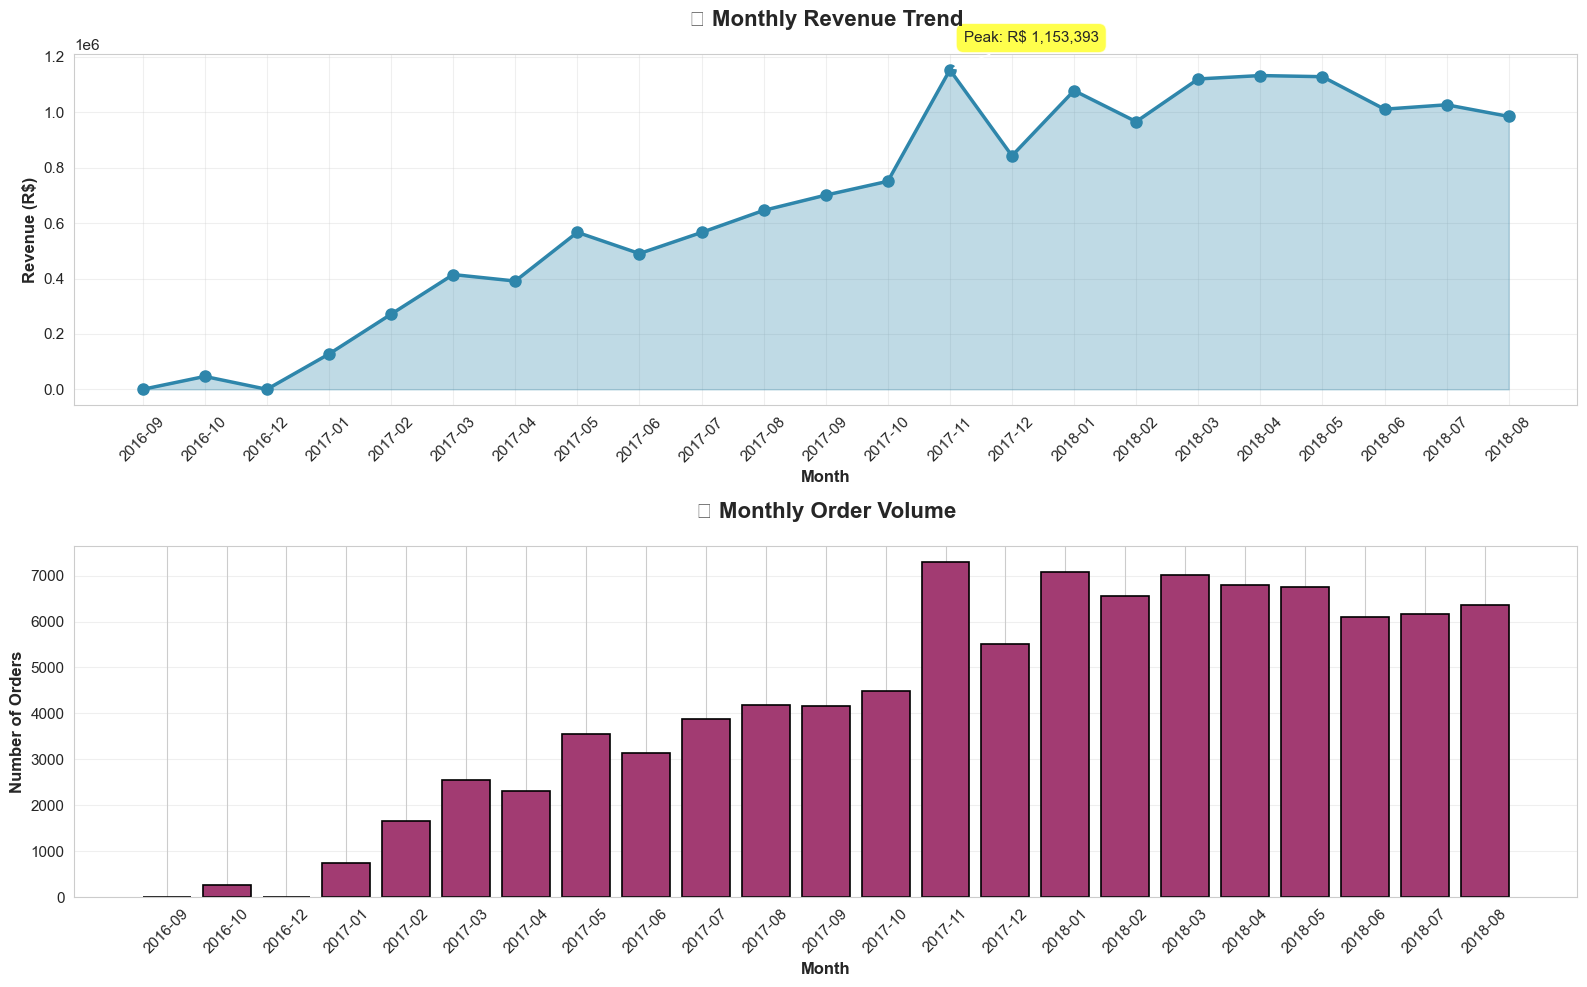


✅ Chart saved: 'revenue_over_time.png'


In [5]:
# Cell 4: Revenue Over Time Analysis
# ============================================================================
print("\n" + "="*70)
print("📅 REVENUE OVER TIME ANALYSIS")
print("="*70)

# Monthly revenue
monthly_revenue = order_summary.groupby(order_summary['order_purchase_timestamp'].dt.to_period('M')).agg({
    'payment_value': 'sum',
    'order_id': 'count'
}).reset_index()

monthly_revenue.columns = ['month', 'revenue', 'orders']
monthly_revenue['month'] = monthly_revenue['month'].astype(str)
monthly_revenue['avg_order_value'] = monthly_revenue['revenue'] / monthly_revenue['orders']

print("\n📊 Monthly Revenue Summary:")
print(monthly_revenue.tail(10))

# Visualization: Revenue Over Time
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Monthly Revenue
axes[0].plot(monthly_revenue['month'], monthly_revenue['revenue'], 
             marker='o', linewidth=2.5, markersize=8, color='#2E86AB')
axes[0].fill_between(range(len(monthly_revenue)), monthly_revenue['revenue'], 
                      alpha=0.3, color='#2E86AB')
axes[0].set_title('📈 Monthly Revenue Trend', fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Revenue (R$)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Add value labels on peaks
max_revenue_idx = monthly_revenue['revenue'].idxmax()
axes[0].annotate(f"Peak: R$ {monthly_revenue.loc[max_revenue_idx, 'revenue']:,.0f}",
                xy=(max_revenue_idx, monthly_revenue.loc[max_revenue_idx, 'revenue']),
                xytext=(10, 20), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Plot 2: Monthly Orders
axes[1].bar(monthly_revenue['month'], monthly_revenue['orders'], 
            color='#A23B72', edgecolor='black', linewidth=1.2)
axes[1].set_title('📦 Monthly Order Volume', fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Orders', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('revenue_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved: 'revenue_over_time.png'")


📦 SALES BY PRODUCT CATEGORY

🏆 Top 15 Categories by Revenue:
                 category  items_sold    revenue  unique_products  avg_price
43          health_beauty        9465 1233131.72             2397     130.28
71          watches_gifts        5857 1165898.98             1300     199.06
7          bed_bath_table       10953 1023434.76             2991      93.44
65         sports_leisure        8430  954673.55             2821     113.25
15  computers_accessories        7643  888613.62             1599     116.27
39        furniture_decor        8160  711927.69             2593      87.25
49             housewares        6795  615628.69             2282      90.60
20             cool_stuff        3718  610204.10              770     164.12
5                    auto        4139  578849.35             1853     139.85
69                   toys        4029  471097.49             1373     116.93
42           garden_tools        4268  470495.28              725     110.24
6             

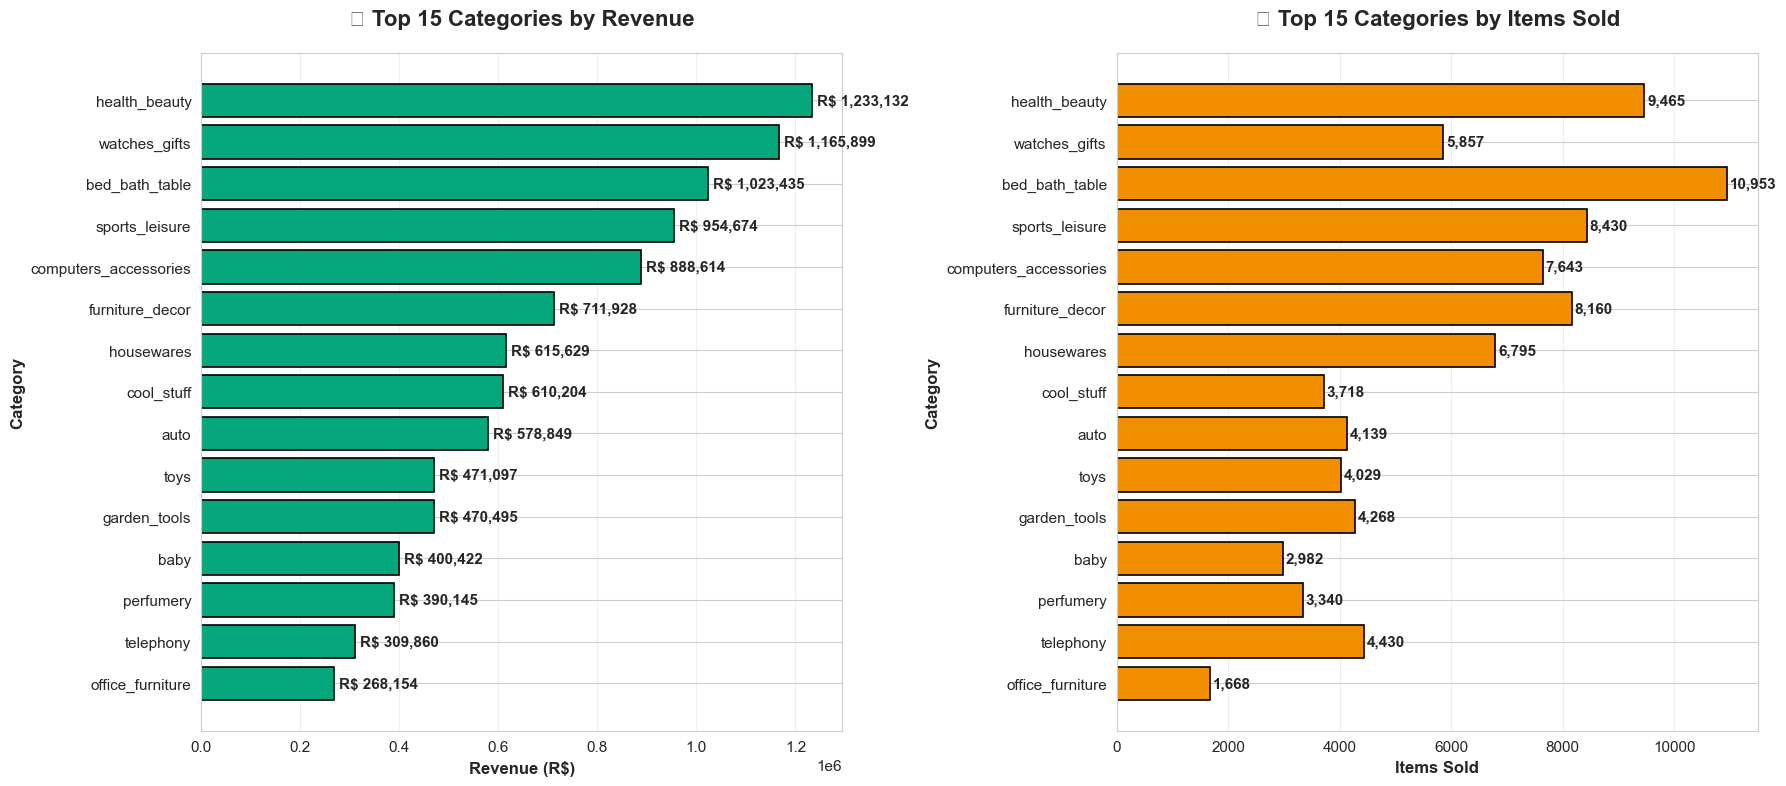


✅ Chart saved: 'sales_by_category.png'


In [6]:
# Cell 5: Sales by Product Category
# ============================================================================
print("\n" + "="*70)
print("📦 SALES BY PRODUCT CATEGORY")
print("="*70)

# Category analysis
category_sales = master_df.groupby('product_category_name_english').agg({
    'order_id': 'count',
    'price': 'sum',
    'product_id': 'nunique'
}).reset_index()

category_sales.columns = ['category', 'items_sold', 'revenue', 'unique_products']
category_sales['avg_price'] = category_sales['revenue'] / category_sales['items_sold']
category_sales = category_sales.sort_values('revenue', ascending=False)

print("\n🏆 Top 15 Categories by Revenue:")
print(category_sales.head(15))

# Visualization: Top 15 Categories
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Revenue by Category
top_15_revenue = category_sales.head(15)
axes[0].barh(top_15_revenue['category'], top_15_revenue['revenue'], 
             color='#06A77D', edgecolor='black', linewidth=1.2)
axes[0].set_title('💰 Top 15 Categories by Revenue', fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Revenue (R$)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Category', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(top_15_revenue['revenue']):
    axes[0].text(v + 10000, i, f'R$ {v:,.0f}', va='center', fontweight='bold')

# Plot 2: Items Sold by Category
top_15_items = category_sales.head(15)
axes[1].barh(top_15_items['category'], top_15_items['items_sold'], 
             color='#F18F01', edgecolor='black', linewidth=1.2)
axes[1].set_title('📦 Top 15 Categories by Items Sold', fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('Items Sold', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Category', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(top_15_items['items_sold']):
    axes[1].text(v + 50, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('sales_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved: 'sales_by_category.png'")


🗺️ GEOGRAPHIC SALES DISTRIBUTION

🏆 Top 10 States by Revenue:
   state  orders    revenue  customers  avg_order_value
25    SP   40494 5769081.27      40494           142.47
18    RJ   12350 2055690.45      12350           166.45
10    MG   11354 1819277.61      11354           160.23
22    RS    5344  861608.40       5344           161.23
17    PR    4923  781919.55       4923           158.83
23    SC    3546  595208.40       3546           167.85
4     BA    3256  591270.60       3256           181.59
6     DF    2080  346146.17       2080           166.42
8     GO    1957  334294.22       1957           170.82
7     ES    1995  317682.65       1995           159.24


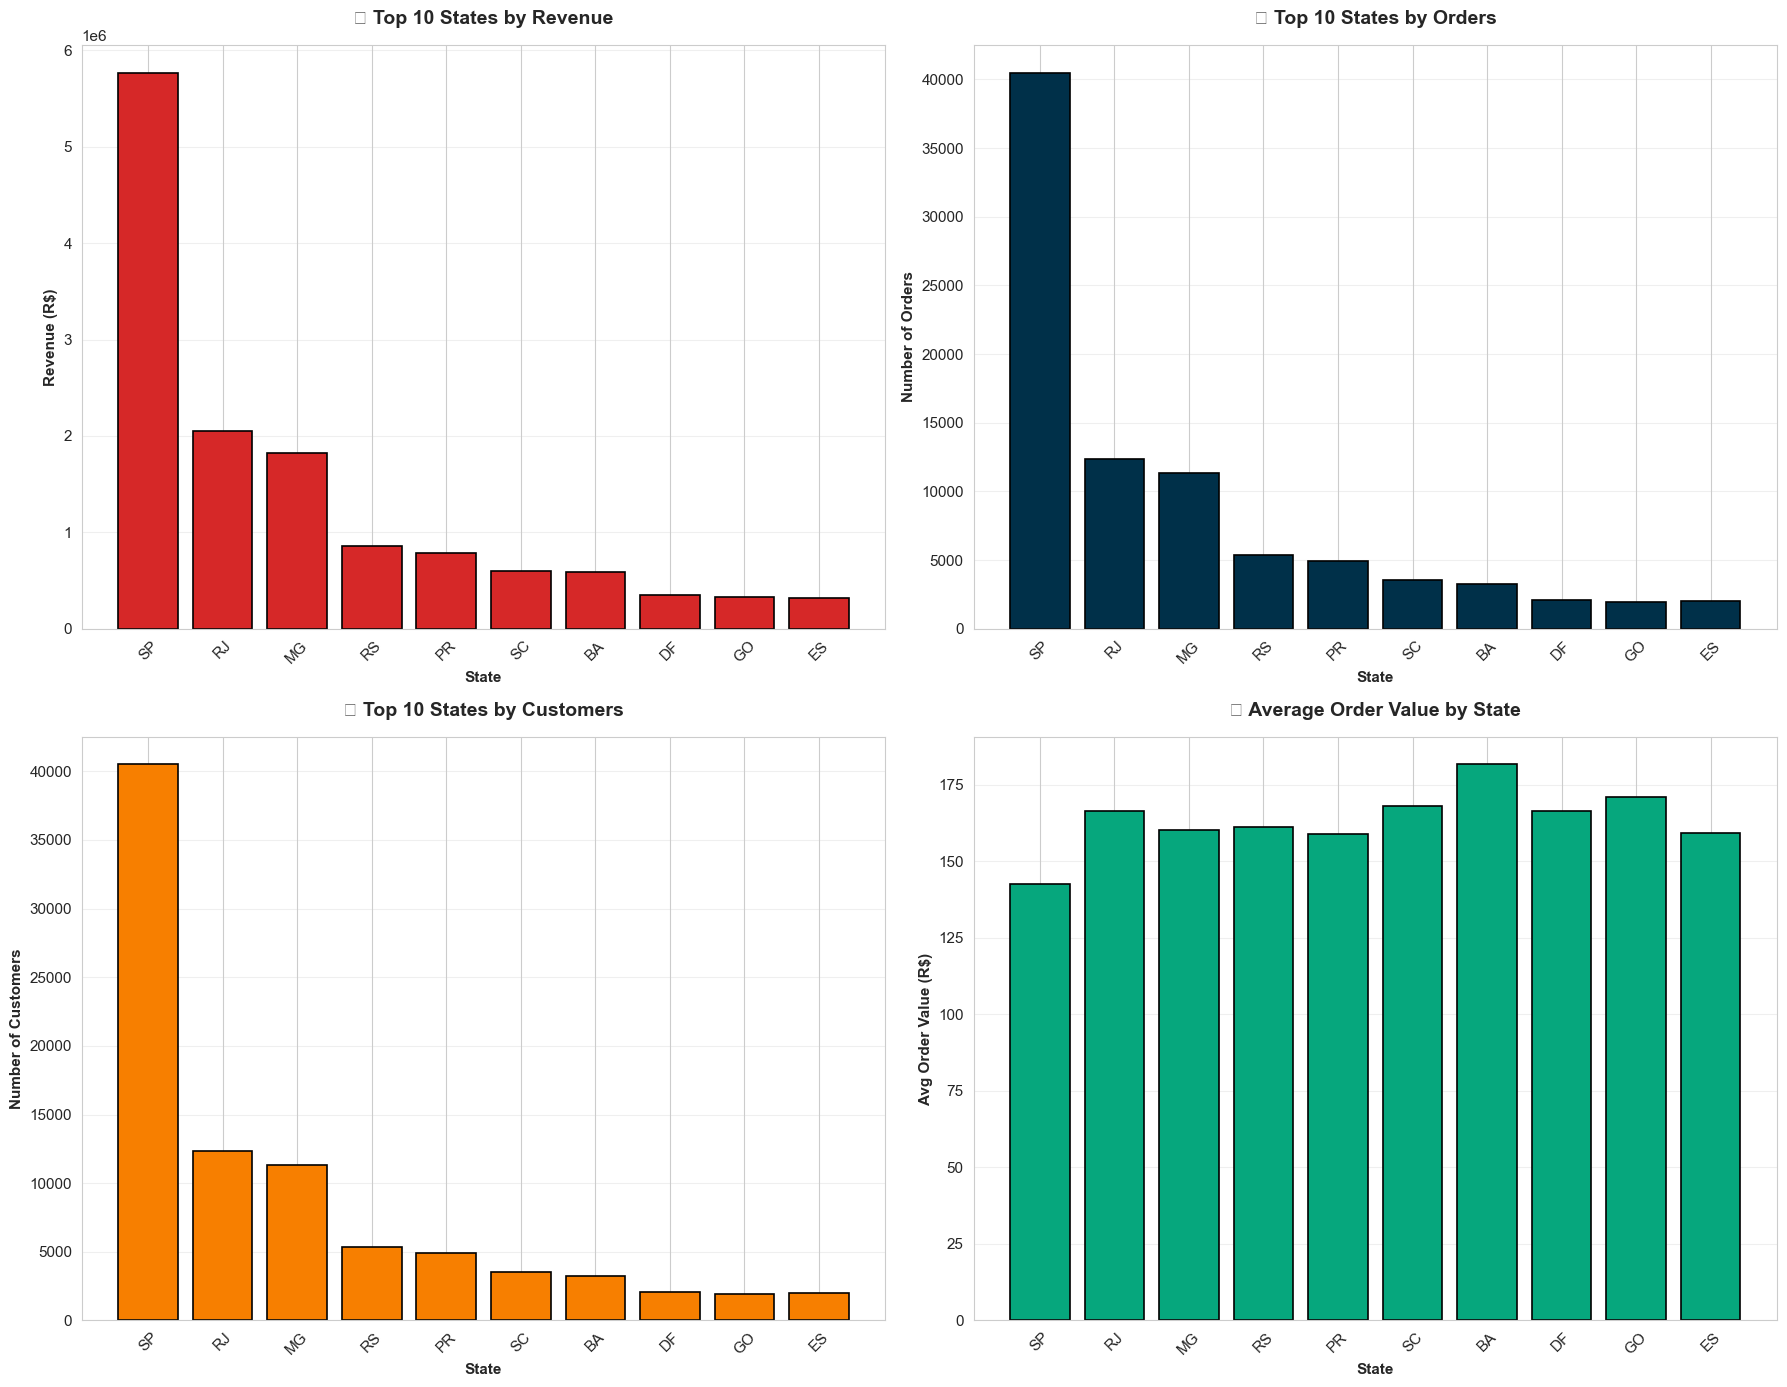


✅ Chart saved: 'geographic_distribution.png'


In [7]:
# Cell 6: Geographic Sales Distribution
# ============================================================================
print("\n" + "="*70)
print("🗺️ GEOGRAPHIC SALES DISTRIBUTION")
print("="*70)

# State-level analysis
state_sales = order_summary.groupby('customer_state').agg({
    'order_id': 'count',
    'payment_value': 'sum',
    'customer_id': 'nunique'
}).reset_index()

state_sales.columns = ['state', 'orders', 'revenue', 'customers']
state_sales['avg_order_value'] = state_sales['revenue'] / state_sales['orders']
state_sales = state_sales.sort_values('revenue', ascending=False)

print("\n🏆 Top 10 States by Revenue:")
print(state_sales.head(10))

# Visualization: Geographic Distribution
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Plot 1: Top 10 States by Revenue
top_10_states = state_sales.head(10)
axes[0, 0].bar(top_10_states['state'], top_10_states['revenue'], 
               color='#D62828', edgecolor='black', linewidth=1.2)
axes[0, 0].set_title('💰 Top 10 States by Revenue', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].set_xlabel('State', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Revenue (R$)', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Top 10 States by Orders
axes[0, 1].bar(top_10_states['state'], top_10_states['orders'], 
               color='#003049', edgecolor='black', linewidth=1.2)
axes[0, 1].set_title('📦 Top 10 States by Orders', fontsize=14, fontweight='bold', pad=15)
axes[0, 1].set_xlabel('State', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Number of Orders', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Top 10 States by Customers
axes[1, 0].bar(top_10_states['state'], top_10_states['customers'], 
               color='#F77F00', edgecolor='black', linewidth=1.2)
axes[1, 0].set_title('👥 Top 10 States by Customers', fontsize=14, fontweight='bold', pad=15)
axes[1, 0].set_xlabel('State', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Number of Customers', fontsize=11, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Average Order Value by State
axes[1, 1].bar(top_10_states['state'], top_10_states['avg_order_value'], 
               color='#06A77D', edgecolor='black', linewidth=1.2)
axes[1, 1].set_title('💵 Average Order Value by State', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].set_xlabel('State', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Avg Order Value (R$)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('geographic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved: 'geographic_distribution.png'")


🏙️ TOP CITIES ANALYSIS

🏆 Top 15 Cities by Revenue:
                       city state  orders    revenue  \
3721              sao paulo    SP   15045 2108162.22   
3250         rio de janeiro    RJ    6601 1111872.32   
465          belo horizonte    MG    2697  406050.87   
582                brasilia    DF    2071  345221.87   
1179               curitiba    PR    1489  238582.26   
3050           porto alegre    RS    1341  214667.83   
732                campinas    SP    1406  209028.97   
3343               salvador    BA    1188  207790.89   
1576              guarulhos    SP    1143  157629.92   
2531                niteroi    RJ     825  135458.19   
3541  sao bernardo do campo    SP     911  116785.21   
1488                goiania    GO     660  113351.20   
1415              fortaleza    CE     618  112951.56   
3526                 santos    SP     700  111170.11   
3178                 recife    PE     593  104795.50   

                     city_state  
3721            

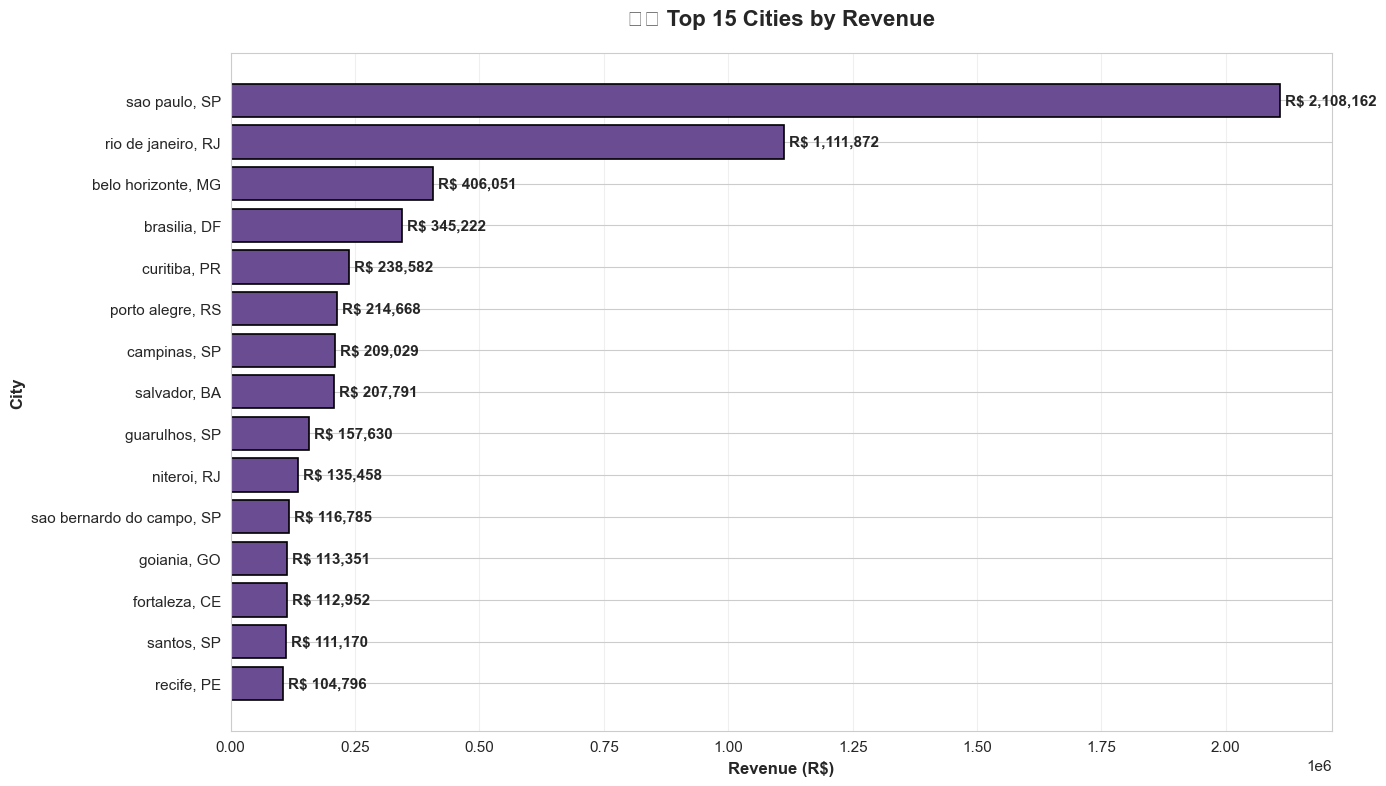


✅ Chart saved: 'top_cities.png'


In [8]:
# Cell 7: Top Cities Analysis
# ============================================================================
print("\n" + "="*70)
print("🏙️ TOP CITIES ANALYSIS")
print("="*70)

# City-level analysis
city_sales = order_summary.groupby(['customer_city', 'customer_state']).agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

city_sales.columns = ['city', 'state', 'orders', 'revenue']
city_sales['city_state'] = city_sales['city'] + ', ' + city_sales['state']
city_sales = city_sales.sort_values('revenue', ascending=False)

print("\n🏆 Top 15 Cities by Revenue:")
print(city_sales.head(15))

# Visualization: Top 15 Cities
plt.figure(figsize=(14, 8))
top_15_cities = city_sales.head(15)
plt.barh(top_15_cities['city_state'], top_15_cities['revenue'], 
         color='#6A4C93', edgecolor='black', linewidth=1.2)
plt.title('🏙️ Top 15 Cities by Revenue', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Revenue (R$)', fontsize=12, fontweight='bold')
plt.ylabel('City', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(top_15_cities['revenue']):
    plt.text(v + 10000, i, f'R$ {v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('top_cities.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved: 'top_cities.png'")


💳 PAYMENT METHOD ANALYSIS

💳 Payment Method Summary:
  payment_type  orders  total_revenue  avg_order_value  avg_installments
1  credit_card   73934    12231730.59           165.44              3.51
0       boleto   19191     2769932.58           144.33              1.00
3      voucher    1861      211402.80           113.60              1.12
2   debit_card    1483      208016.88           140.27              1.00


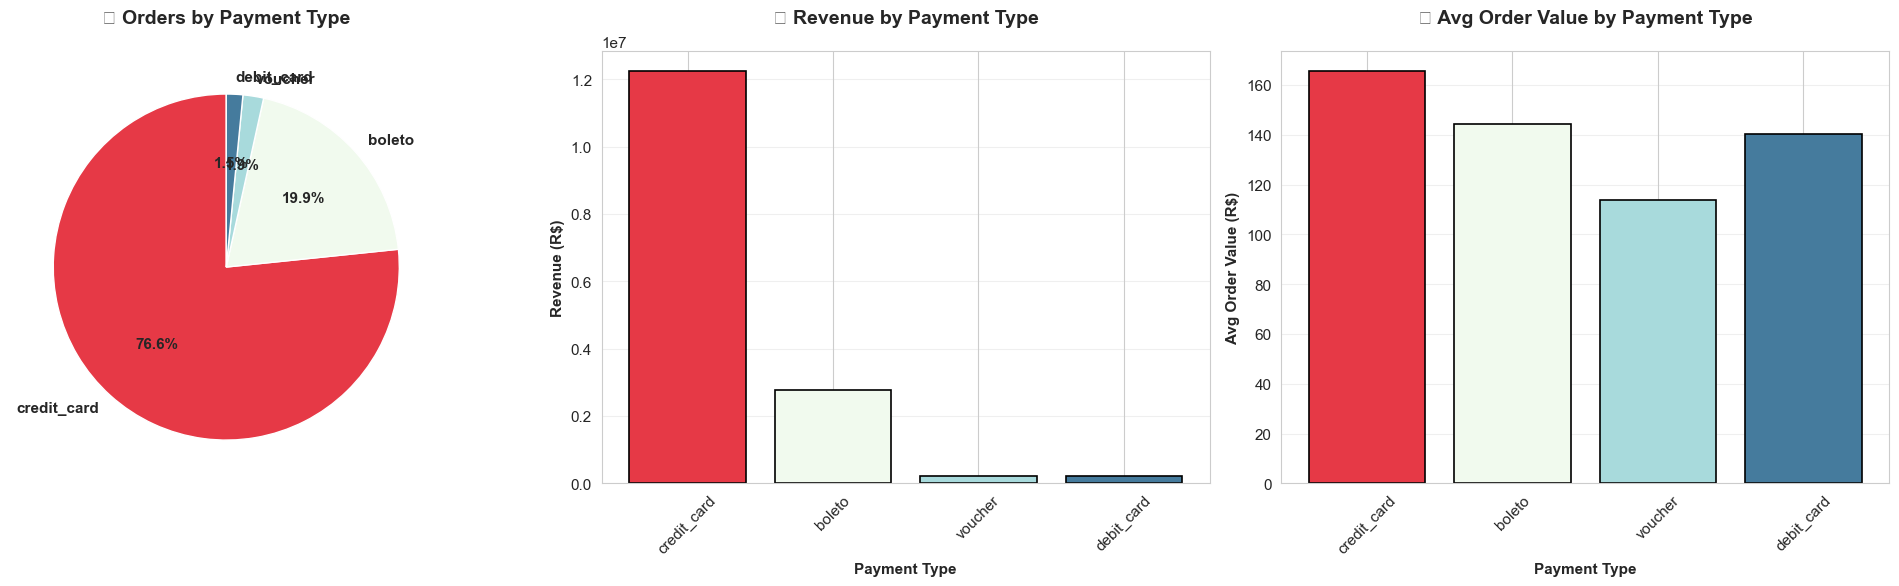


✅ Chart saved: 'payment_methods.png'


In [9]:
# Cell 8: Payment Method Analysis
# ============================================================================
print("\n" + "="*70)
print("💳 PAYMENT METHOD ANALYSIS")
print("="*70)

# Payment type analysis
payment_analysis = order_summary.groupby('payment_type').agg({
    'order_id': 'count',
    'payment_value': ['sum', 'mean'],
    'payment_installments': 'mean'
}).reset_index()

payment_analysis.columns = ['payment_type', 'orders', 'total_revenue', 'avg_order_value', 'avg_installments']
payment_analysis = payment_analysis.sort_values('total_revenue', ascending=False)

print("\n💳 Payment Method Summary:")
print(payment_analysis)

# Visualization: Payment Methods
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Orders by Payment Type
colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']
axes[0].pie(payment_analysis['orders'], labels=payment_analysis['payment_type'], 
            autopct='%1.1f%%', startangle=90, colors=colors,
            textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[0].set_title('📊 Orders by Payment Type', fontsize=14, fontweight='bold', pad=20)

# Plot 2: Revenue by Payment Type
axes[1].bar(payment_analysis['payment_type'], payment_analysis['total_revenue'], 
            color=colors, edgecolor='black', linewidth=1.2)
axes[1].set_title('💰 Revenue by Payment Type', fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlabel('Payment Type', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Revenue (R$)', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Average Order Value by Payment Type
axes[2].bar(payment_analysis['payment_type'], payment_analysis['avg_order_value'], 
            color=colors, edgecolor='black', linewidth=1.2)
axes[2].set_title('💵 Avg Order Value by Payment Type', fontsize=14, fontweight='bold', pad=20)
axes[2].set_xlabel('Payment Type', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Avg Order Value (R$)', fontsize=11, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('payment_methods.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved: 'payment_methods.png'")


⏰ SHOPPING PATTERNS ANALYSIS

📅 Orders by Day of Week:
         day  orders    revenue
1     Monday   15701 2530591.86
5    Tuesday   15502 2473930.77
6  Wednesday   15074 2396215.34
4   Thursday   14322 2283964.44
0     Friday   13684 2222758.59
2   Saturday   10555 1706107.53
3     Sunday   11632 1807514.32

⏰ Peak Shopping Hours:
    hour  orders    revenue
16    16    6475 1059424.74
11    11    6385  996529.71
14    14    6383 1075200.03
13    13    6309  989086.30
15    15    6249 1026466.49
21    21    6039  945864.84
20    20    6007  968162.96
10    10    5978  951042.29
17    17    5961  949223.64
12    12    5802  950042.53


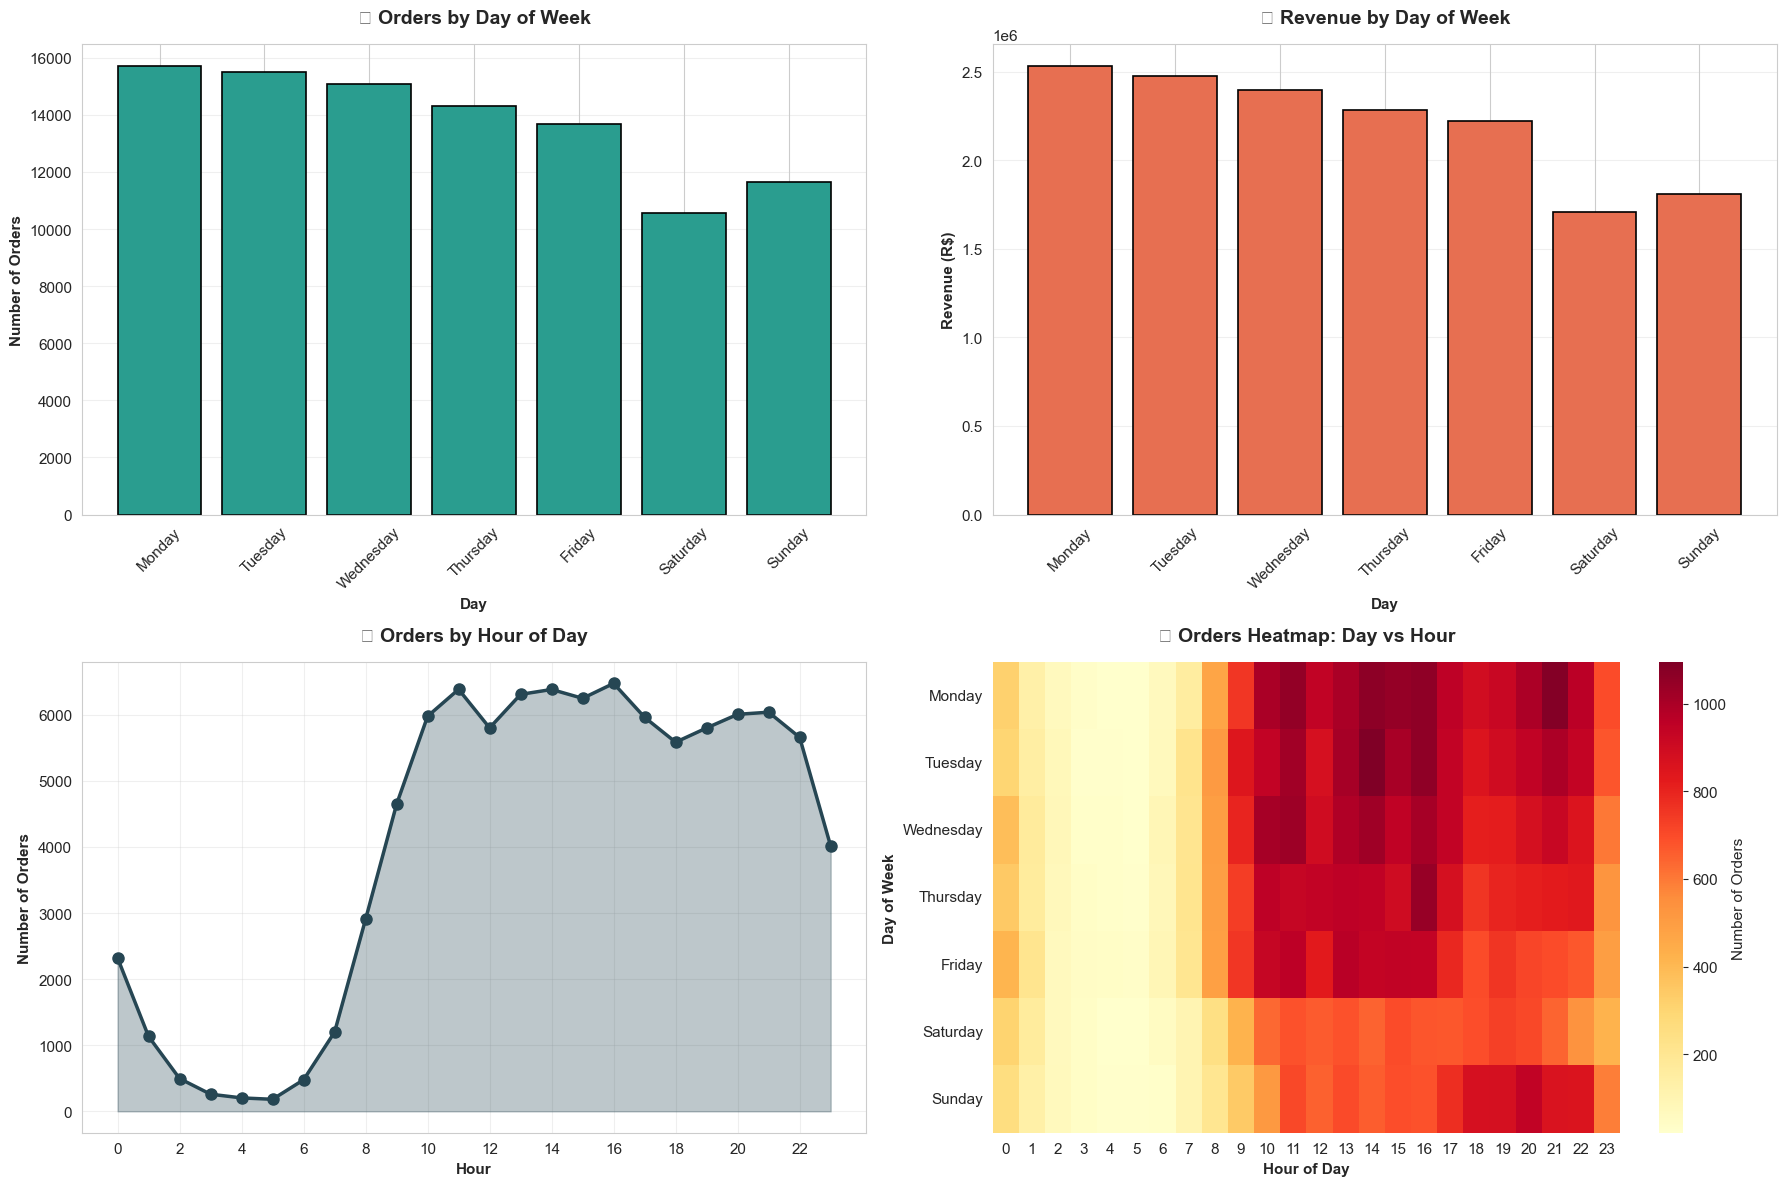


✅ Chart saved: 'shopping_patterns.png'


In [10]:
# Cell 9: Shopping Patterns - Day of Week & Hour
# ============================================================================
print("\n" + "="*70)
print("⏰ SHOPPING PATTERNS ANALYSIS")
print("="*70)

# Day of week analysis
day_analysis = order_summary.groupby('order_day_name').agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

day_analysis.columns = ['day', 'orders', 'revenue']

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_analysis['day'] = pd.Categorical(day_analysis['day'], categories=day_order, ordered=True)
day_analysis = day_analysis.sort_values('day')

print("\n📅 Orders by Day of Week:")
print(day_analysis)

# Hour analysis
hour_analysis = order_summary.groupby('order_hour').agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

hour_analysis.columns = ['hour', 'orders', 'revenue']

print("\n⏰ Peak Shopping Hours:")
print(hour_analysis.sort_values('orders', ascending=False).head(10))

# Visualization: Shopping Patterns
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Orders by Day of Week
axes[0, 0].bar(day_analysis['day'], day_analysis['orders'], 
               color='#2A9D8F', edgecolor='black', linewidth=1.2)
axes[0, 0].set_title('📅 Orders by Day of Week', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].set_xlabel('Day', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Number of Orders', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Revenue by Day of Week
axes[0, 1].bar(day_analysis['day'], day_analysis['revenue'], 
               color='#E76F51', edgecolor='black', linewidth=1.2)
axes[0, 1].set_title('💰 Revenue by Day of Week', fontsize=14, fontweight='bold', pad=15)
axes[0, 1].set_xlabel('Day', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Revenue (R$)', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Orders by Hour
axes[1, 0].plot(hour_analysis['hour'], hour_analysis['orders'], 
                marker='o', linewidth=2.5, markersize=8, color='#264653')
axes[1, 0].fill_between(hour_analysis['hour'], hour_analysis['orders'], 
                         alpha=0.3, color='#264653')
axes[1, 0].set_title('⏰ Orders by Hour of Day', fontsize=14, fontweight='bold', pad=15)
axes[1, 0].set_xlabel('Hour', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Number of Orders', fontsize=11, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(range(0, 24, 2))

# Plot 4: Heatmap - Day vs Hour
pivot_data = order_summary.groupby(['order_day_name', 'order_hour']).size().reset_index(name='orders')
pivot_table = pivot_data.pivot(index='order_day_name', columns='order_hour', values='orders')
pivot_table = pivot_table.reindex(day_order)

sns.heatmap(pivot_table, cmap='YlOrRd', annot=False, fmt='g', 
            cbar_kws={'label': 'Number of Orders'}, ax=axes[1, 1])
axes[1, 1].set_title('🔥 Orders Heatmap: Day vs Hour', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].set_xlabel('Hour of Day', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Day of Week', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('shopping_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved: 'shopping_patterns.png'")


⭐ CUSTOMER SATISFACTION ANALYSIS

⭐ Review Score Distribution:
review_score
1.00     9343
2.00     2923
3.00     8554
4.00    18893
5.00    56757
Name: count, dtype: int64

🏆 Top 10 Categories by Satisfaction (min 100 reviews):
                   category  avg_score  review_count
8    books_general_interest       4.50           536
22  costruction_tools_tools       4.39           103
10          books_technical       4.38           263
37               food_drink       4.36           269
53      luggage_accessories       4.35          1077
31            fashion_shoes       4.28           257
38        furniture_bedroom       4.25           103
66               stationery       4.24          2466
36                     food       4.23           499
44          home_appliances       4.22           754

⚠️ Bottom 10 Categories by Satisfaction:
                 category  avg_score  review_count
48      home_construction       3.95           596
39        furniture_decor       3.95        

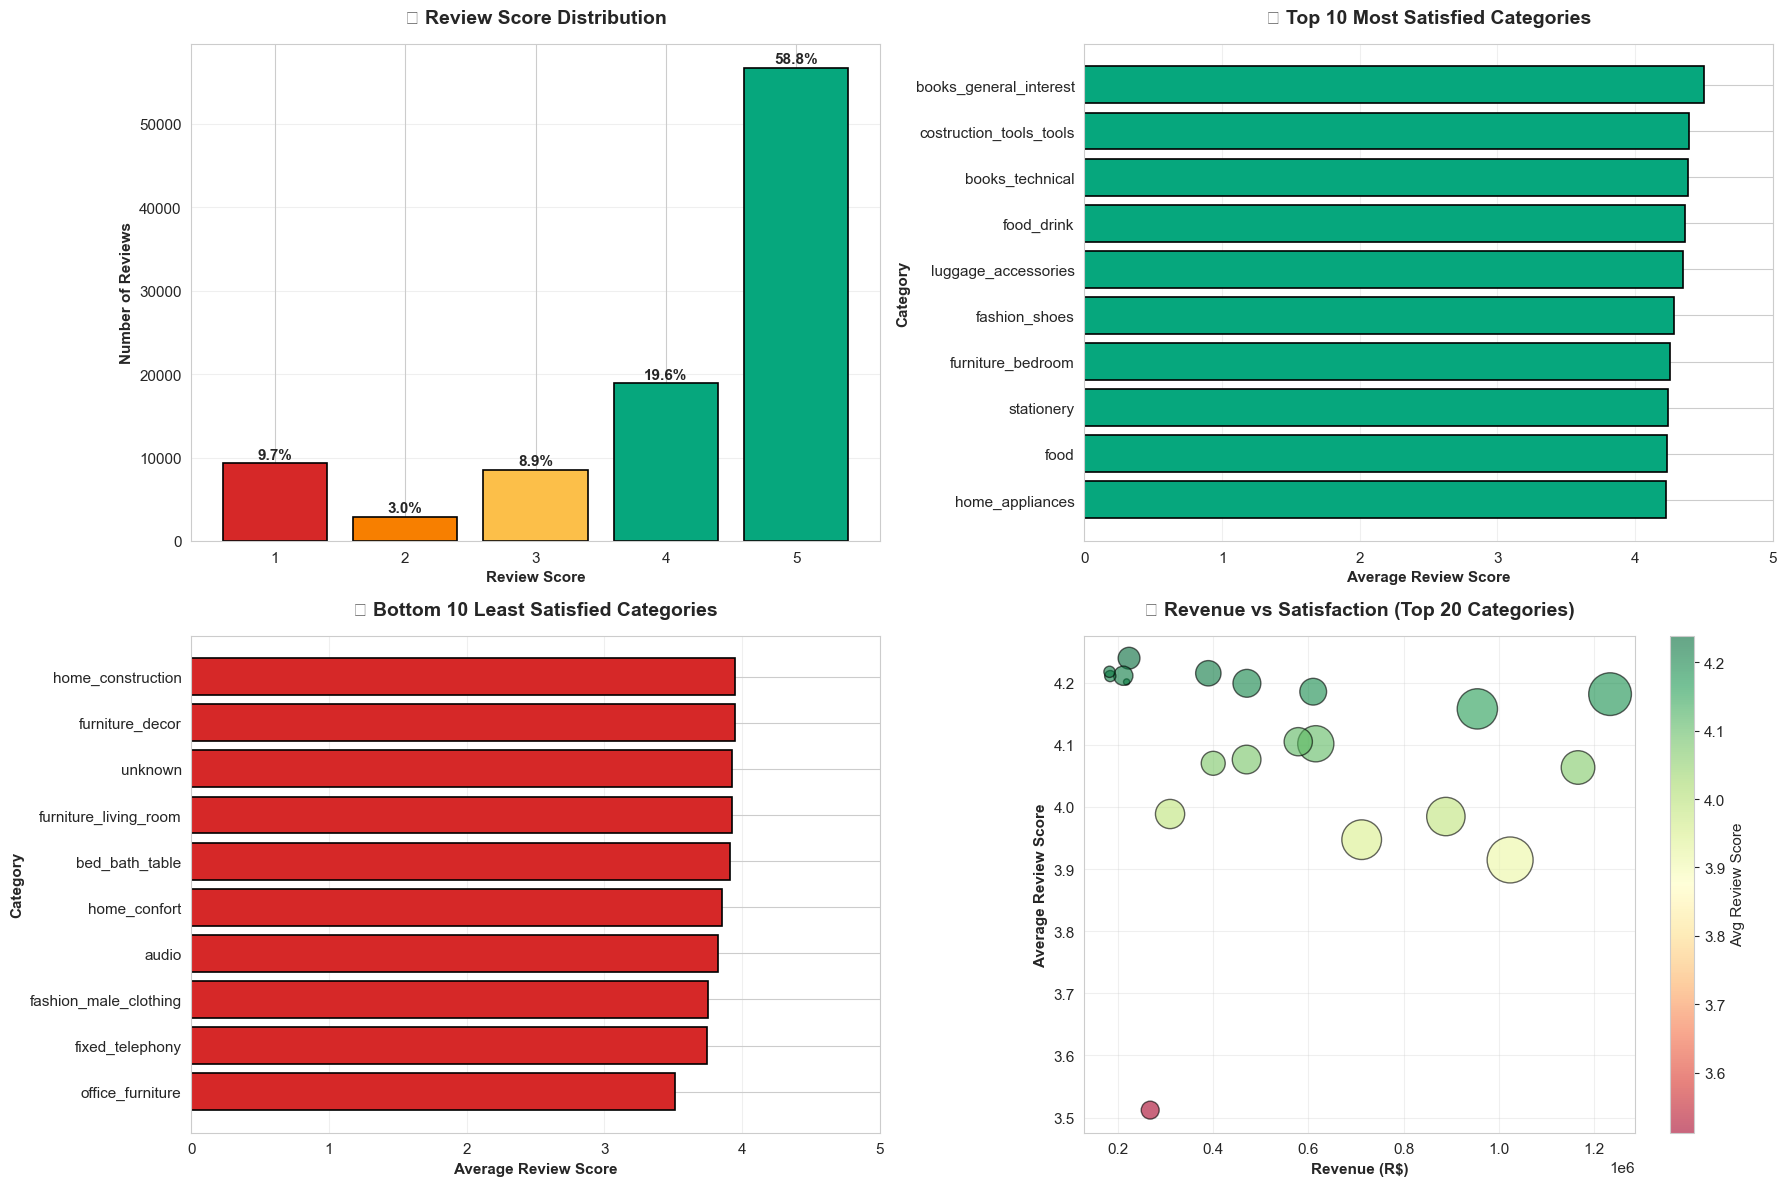


✅ Chart saved: 'customer_satisfaction.png'


In [11]:
# Cell 10: Customer Satisfaction Analysis
# ============================================================================
print("\n" + "="*70)
print("⭐ CUSTOMER SATISFACTION ANALYSIS")
print("="*70)

# Review score distribution
review_dist = order_summary['review_score'].value_counts().sort_index()

print("\n⭐ Review Score Distribution:")
print(review_dist)

# Satisfaction by category
category_satisfaction = master_df.groupby('product_category_name_english').agg({
    'review_score': ['mean', 'count']
}).reset_index()

category_satisfaction.columns = ['category', 'avg_score', 'review_count']
category_satisfaction = category_satisfaction[category_satisfaction['review_count'] >= 100]  # Min 100 reviews
category_satisfaction = category_satisfaction.sort_values('avg_score', ascending=False)

print("\n🏆 Top 10 Categories by Satisfaction (min 100 reviews):")
print(category_satisfaction.head(10))

print("\n⚠️ Bottom 10 Categories by Satisfaction:")
print(category_satisfaction.tail(10))

# Visualization: Customer Satisfaction
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Review Score Distribution
axes[0, 0].bar(review_dist.index, review_dist.values, 
               color=['#D62828', '#F77F00', '#FCBF49', '#06A77D', '#06A77D'], 
               edgecolor='black', linewidth=1.2)
axes[0, 0].set_title('⭐ Review Score Distribution', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].set_xlabel('Review Score', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Number of Reviews', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Add percentage labels
for i, v in enumerate(review_dist.values):
    pct = (v / review_dist.sum()) * 100
    axes[0, 0].text(review_dist.index[i], v + 500, f'{pct:.1f}%', 
                    ha='center', fontweight='bold')

# Plot 2: Top 10 Most Satisfied Categories
top_10_satisfied = category_satisfaction.head(10)
axes[0, 1].barh(top_10_satisfied['category'], top_10_satisfied['avg_score'], 
                color='#06A77D', edgecolor='black', linewidth=1.2)
axes[0, 1].set_title('😊 Top 10 Most Satisfied Categories', fontsize=14, fontweight='bold', pad=15)
axes[0, 1].set_xlabel('Average Review Score', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Category', fontsize=11, fontweight='bold')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')
axes[0, 1].set_xlim(0, 5)

# Plot 3: Bottom 10 Least Satisfied Categories
bottom_10_satisfied = category_satisfaction.tail(10)
axes[1, 0].barh(bottom_10_satisfied['category'], bottom_10_satisfied['avg_score'], 
                color='#D62828', edgecolor='black', linewidth=1.2)
axes[1, 0].set_title('😞 Bottom 10 Least Satisfied Categories', fontsize=14, fontweight='bold', pad=15)
axes[1, 0].set_xlabel('Average Review Score', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Category', fontsize=11, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')
axes[1, 0].set_xlim(0, 5)

# Plot 4: Satisfaction vs Revenue (Top 20 categories)
top_20_categories = category_sales.head(20)
category_satisfaction_revenue = top_20_categories.merge(
    category_satisfaction, on='category', how='left'
)

scatter = axes[1, 1].scatter(category_satisfaction_revenue['revenue'], 
                             category_satisfaction_revenue['avg_score'],
                             s=category_satisfaction_revenue['items_sold']/10,
                             alpha=0.6, c=category_satisfaction_revenue['avg_score'],
                             cmap='RdYlGn', edgecolors='black', linewidth=1)
axes[1, 1].set_title('💰 Revenue vs Satisfaction (Top 20 Categories)', 
                     fontsize=14, fontweight='bold', pad=15)
axes[1, 1].set_xlabel('Revenue (R$)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Average Review Score', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Avg Review Score')

plt.tight_layout()
plt.savefig('customer_satisfaction.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved: 'customer_satisfaction.png'")


🚚 DELIVERY PERFORMANCE ANALYSIS

📊 Delivery Metrics:
   Average Delivery Time: 12.1 days
   Median Delivery Time: 10.0 days
   On-Time Delivery Rate: 93.2%
   Late Deliveries: 6,534 (6.8%)

⚠️ States with Longest Delivery Times (min 100 orders):
   state  avg_delivery_days  on_time_rate  orders
2     AM              25.99          0.97     145
1     AL              24.04          0.79     397
13    PA              23.32          0.89     946
9     MA              21.12          0.83     717
24    SE              21.03          0.85     335
5     CE              20.82          0.86    1279
14    PB              19.95          0.90     517
16    PI              18.99          0.86     476
20    RO              18.91          0.97     243
4     BA              18.87          0.88    3256

✅ States with Shortest Delivery Times:
   state  avg_delivery_days  on_time_rate  orders
7     ES              15.33          0.89    1995
11    MS              15.19          0.90     701
8     GO     

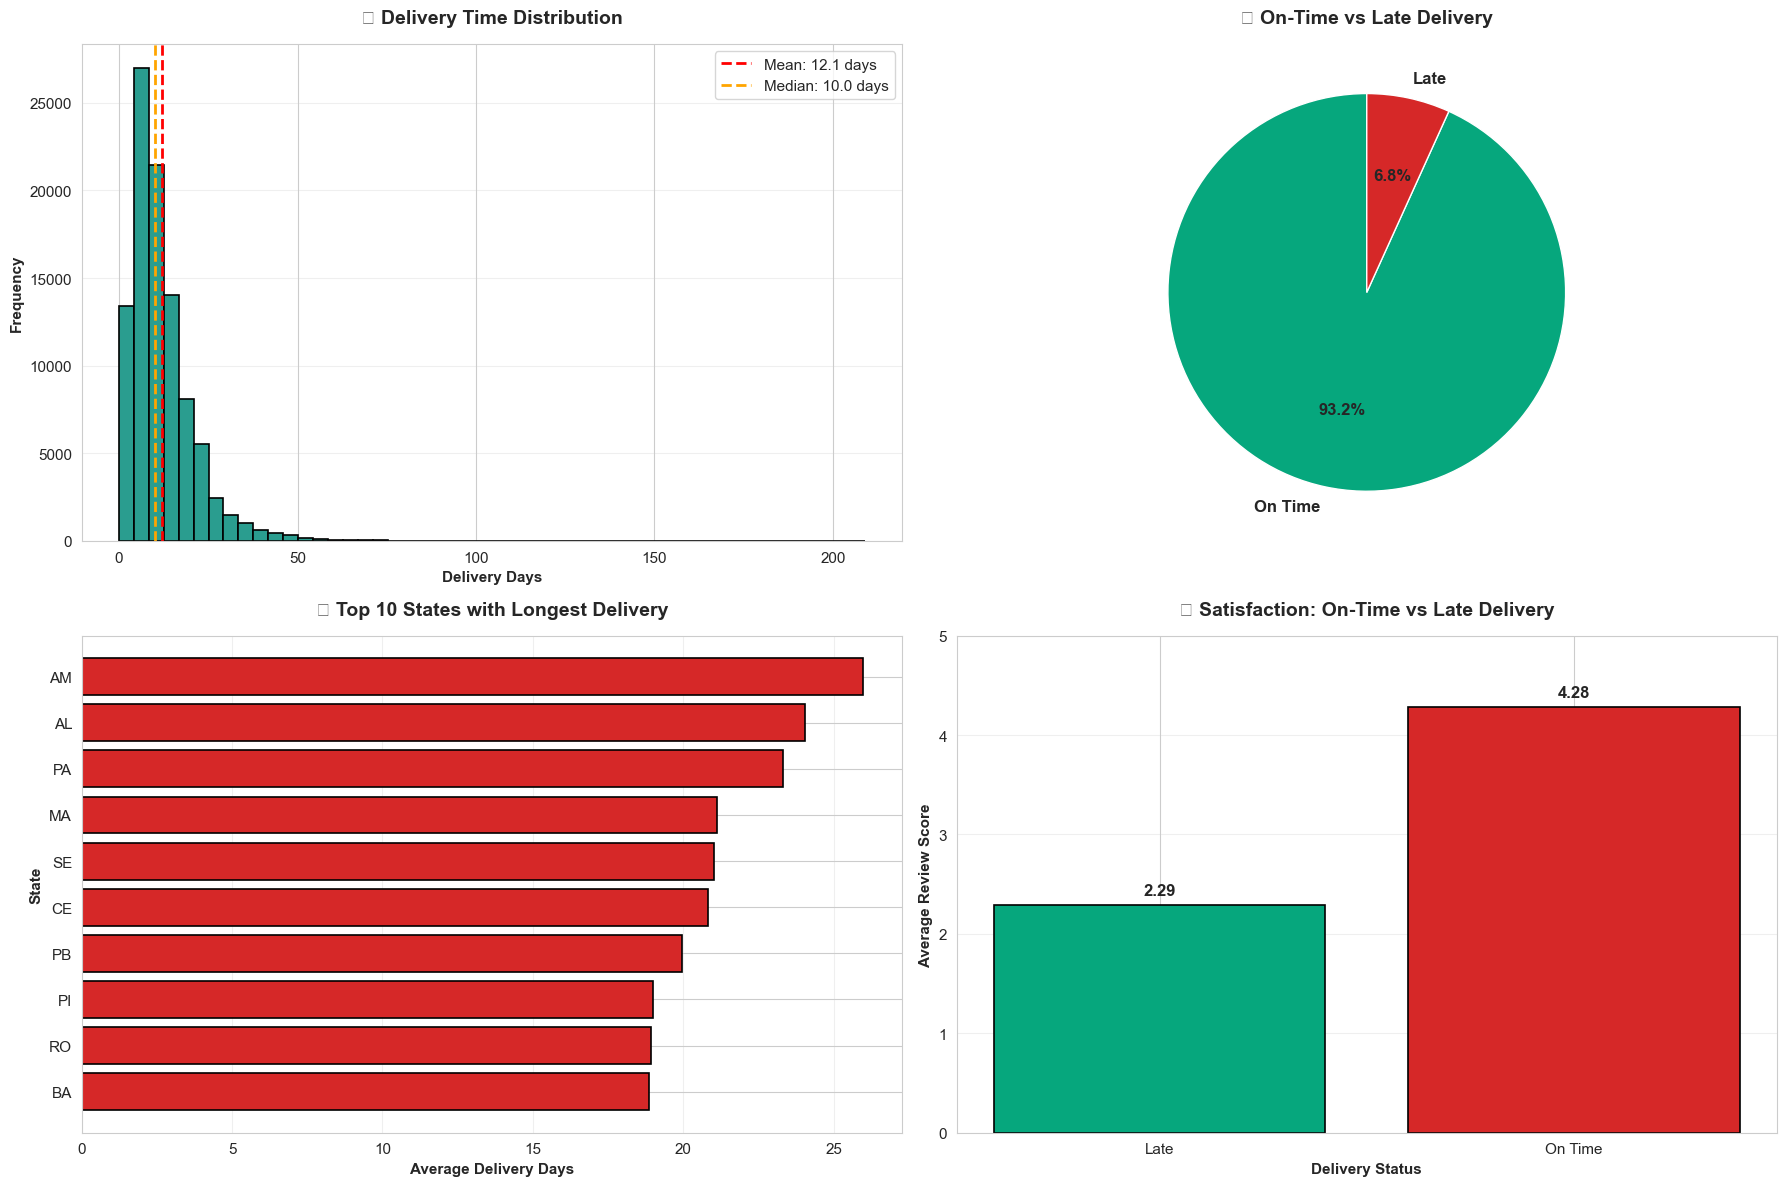


✅ Chart saved: 'delivery_performance.png'


In [12]:
# Cell 11: Delivery Performance Analysis
# ============================================================================
print("\n" + "="*70)
print("🚚 DELIVERY PERFORMANCE ANALYSIS")
print("="*70)

# Delivery metrics
print(f"\n📊 Delivery Metrics:")
print(f"   Average Delivery Time: {order_summary['delivery_days'].mean():.1f} days")
print(f"   Median Delivery Time: {order_summary['delivery_days'].median():.1f} days")
print(f"   On-Time Delivery Rate: {order_summary['delivered_on_time'].mean() * 100:.1f}%")
print(f"   Late Deliveries: {(order_summary['delivered_on_time'] == 0).sum():,} ({(order_summary['delivered_on_time'] == 0).sum() / len(order_summary) * 100:.1f}%)")

# Delivery by state
state_delivery = order_summary.groupby('customer_state').agg({
    'delivery_days': 'mean',
    'delivered_on_time': 'mean',
    'order_id': 'count'
}).reset_index()

state_delivery.columns = ['state', 'avg_delivery_days', 'on_time_rate', 'orders']
state_delivery = state_delivery[state_delivery['orders'] >= 100]  # Min 100 orders
state_delivery = state_delivery.sort_values('avg_delivery_days', ascending=False)

print("\n⚠️ States with Longest Delivery Times (min 100 orders):")
print(state_delivery.head(10))

print("\n✅ States with Shortest Delivery Times:")
print(state_delivery.tail(10))

# Impact of delivery on satisfaction
delivery_satisfaction = order_summary.groupby('delivered_on_time').agg({
    'review_score': 'mean',
    'order_id': 'count'
}).reset_index()

delivery_satisfaction['delivery_status'] = delivery_satisfaction['delivered_on_time'].map({
    1: 'On Time',
    0: 'Late'
})

print("\n⭐ Satisfaction by Delivery Performance:")
print(delivery_satisfaction)

# Visualization: Delivery Performance
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Delivery Time Distribution
axes[0, 0].hist(order_summary['delivery_days'], bins=50, 
                color='#2A9D8F', edgecolor='black', linewidth=1.2)
axes[0, 0].axvline(order_summary['delivery_days'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f"Mean: {order_summary['delivery_days'].mean():.1f} days")
axes[0, 0].axvline(order_summary['delivery_days'].median(), color='orange', 
                   linestyle='--', linewidth=2, label=f"Median: {order_summary['delivery_days'].median():.1f} days")
axes[0, 0].set_title('📦 Delivery Time Distribution', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].set_xlabel('Delivery Days', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Plot 2: On-Time vs Late Delivery
delivery_counts = order_summary['delivered_on_time'].value_counts()
labels = ['On Time', 'Late']
colors_delivery = ['#06A77D', '#D62828']
axes[0, 1].pie(delivery_counts.values, labels=labels, autopct='%1.1f%%', 
               startangle=90, colors=colors_delivery,
               textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0, 1].set_title('⏰ On-Time vs Late Delivery', fontsize=14, fontweight='bold', pad=15)

# Plot 3: Top 10 States with Longest Delivery
top_10_slow = state_delivery.head(10)
axes[1, 0].barh(top_10_slow['state'], top_10_slow['avg_delivery_days'], 
                color='#D62828', edgecolor='black', linewidth=1.2)
axes[1, 0].set_title('🐌 Top 10 States with Longest Delivery', fontsize=14, fontweight='bold', pad=15)
axes[1, 0].set_xlabel('Average Delivery Days', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('State', fontsize=11, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Plot 4: Satisfaction by Delivery Status
axes[1, 1].bar(delivery_satisfaction['delivery_status'], 
               delivery_satisfaction['review_score'],
               color=['#06A77D', '#D62828'], edgecolor='black', linewidth=1.2)
axes[1, 1].set_title('⭐ Satisfaction: On-Time vs Late Delivery', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].set_xlabel('Delivery Status', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Average Review Score', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_ylim(0, 5)

# Add value labels
for i, v in enumerate(delivery_satisfaction['review_score']):
    axes[1, 1].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('delivery_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved: 'delivery_performance.png'")


💵 ORDER VALUE DISTRIBUTION

📊 Order Value Statistics:
   Mean: R$ 159.86
   Median: R$ 105.28
   Std Dev: R$ 218.82
   Min: R$ 9.59
   Max: R$ 13664.08

📊 Order Value Percentiles:
   10th percentile: R$ 39.59
   25th percentile: R$ 61.88
   50th percentile: R$ 105.28
   75th percentile: R$ 176.33
   90th percentile: R$ 305.97
   95th percentile: R$ 446.34
   99th percentile: R$ 1052.40


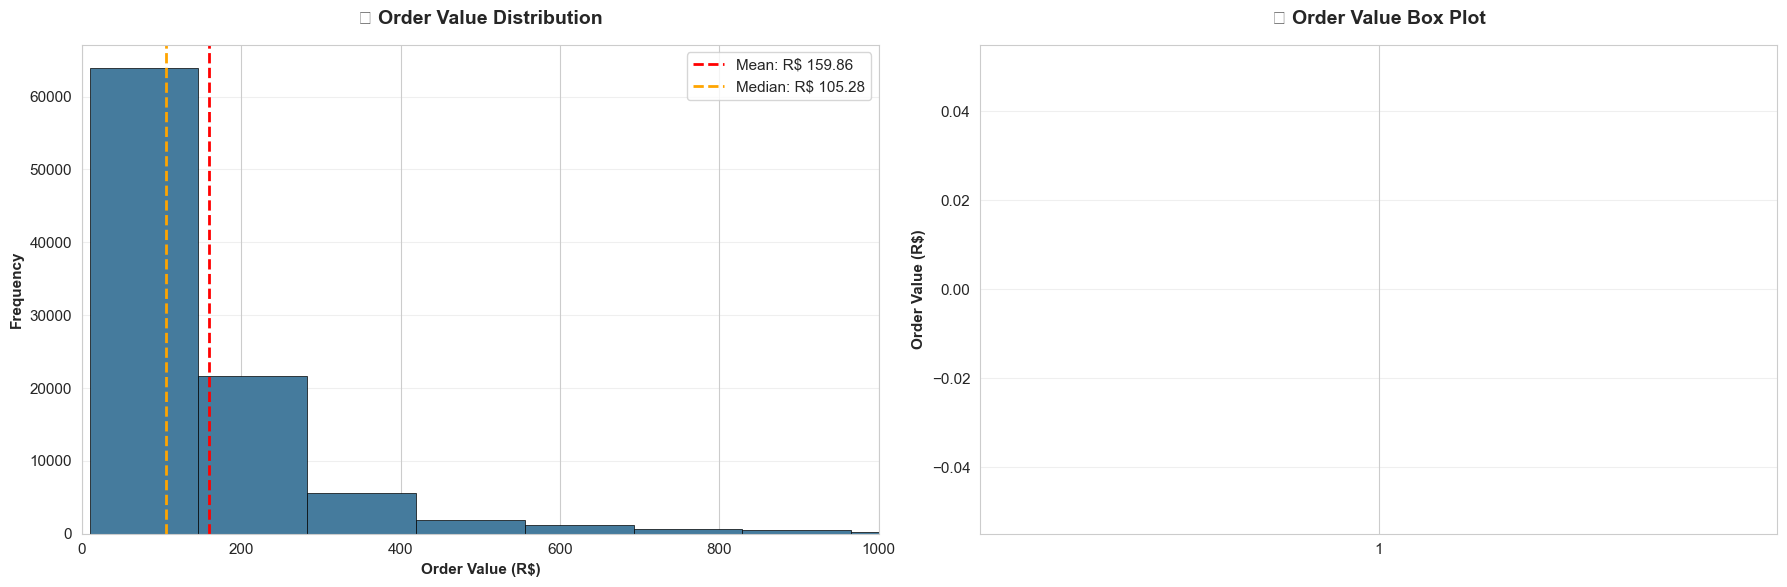


✅ Chart saved: 'order_value_distribution.png'


In [13]:
# Cell 12: Order Value Distribution
# ============================================================================
print("\n" + "="*70)
print("💵 ORDER VALUE DISTRIBUTION")
print("="*70)

# Order value statistics
print(f"\n📊 Order Value Statistics:")
print(f"   Mean: R$ {order_summary['payment_value'].mean():.2f}")
print(f"   Median: R$ {order_summary['payment_value'].median():.2f}")
print(f"   Std Dev: R$ {order_summary['payment_value'].std():.2f}")
print(f"   Min: R$ {order_summary['payment_value'].min():.2f}")
print(f"   Max: R$ {order_summary['payment_value'].max():.2f}")

# Percentiles
percentiles = [10, 25, 50, 75, 90, 95, 99]
print(f"\n📊 Order Value Percentiles:")
for p in percentiles:
    value = order_summary['payment_value'].quantile(p/100)
    print(f"   {p}th percentile: R$ {value:.2f}")

# Visualization: Order Value Distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Histogram
axes[0].hist(order_summary['payment_value'], bins=100, 
             color='#457B9D', edgecolor='black', linewidth=0.5)
axes[0].axvline(order_summary['payment_value'].mean(), color='red', 
                linestyle='--', linewidth=2, label=f"Mean: R$ {order_summary['payment_value'].mean():.2f}")
axes[0].axvline(order_summary['payment_value'].median(), color='orange', 
                linestyle='--', linewidth=2, label=f"Median: R$ {order_summary['payment_value'].median():.2f}")
axes[0].set_title('💵 Order Value Distribution', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Order Value (R$)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_xlim(0, 1000)  # Focus on main distribution
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Plot 2: Box Plot
axes[1].boxplot(order_summary['payment_value'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='#06A77D', color='black'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axes[1].set_title('💵 Order Value Box Plot', fontsize=14, fontweight='bold', pad=15)
axes[1].set_ylabel('Order Value (R$)', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('order_value_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved: 'order_value_distribution.png'")

In [14]:
# Cell 13: Key Insights Summary
# ============================================================================
print("\n" + "="*70)
print("💡 KEY INSIGHTS & BUSINESS RECOMMENDATIONS")
print("="*70)

print("\n🎯 TOP INSIGHTS:")

print("\n1️⃣ REVENUE & SALES:")
print(f"   • Total Revenue: R$ {total_revenue:,.2f}")
print(f"   • Peak Revenue Month: {monthly_revenue.loc[monthly_revenue['revenue'].idxmax(), 'month']}")
print(f"   • Average Order Value: R$ {avg_order_value:.2f}")
print(f"   • Top Category: {category_sales.iloc[0]['category']} (R$ {category_sales.iloc[0]['revenue']:,.2f})")

print("\n2️⃣ CUSTOMER BEHAVIOR:")
print(f"   • Most Popular Payment: {payment_analysis.iloc[0]['payment_type']}")
print(f"   • Peak Shopping Day: {day_analysis.loc[day_analysis['orders'].idxmax(), 'day']}")
print(f"   • Peak Shopping Hour: {hour_analysis.loc[hour_analysis['orders'].idxmax(), 'hour']}:00")
print(f"   • Weekend Orders: {order_summary['is_weekend'].sum():,} ({order_summary['is_weekend'].mean() * 100:.1f}%)")

print("\n3️⃣ GEOGRAPHIC INSIGHTS:")
print(f"   • Top State: {state_sales.iloc[0]['state']} (R$ {state_sales.iloc[0]['revenue']:,.2f})")
print(f"   • Top City: {city_sales.iloc[0]['city']}, {city_sales.iloc[0]['state']}")
print(f"   • States Covered: {state_sales.shape[0]}")

print("\n4️⃣ CUSTOMER SATISFACTION:")
print(f"   • Average Review Score: {order_summary['review_score'].mean():.2f}/5.0")
print(f"   • 5-Star Reviews: {(order_summary['review_score'] == 5).sum() / len(order_summary) * 100:.1f}%")
print(f"   • Most Satisfied Category: {category_satisfaction.iloc[0]['category']} ({category_satisfaction.iloc[0]['avg_score']:.2f}/5.0)")
print(f"   • Least Satisfied Category: {category_satisfaction.iloc[-1]['category']} ({category_satisfaction.iloc[-1]['avg_score']:.2f}/5.0)")

print("\n5️⃣ DELIVERY PERFORMANCE:")
print(f"   • Average Delivery Time: {order_summary['delivery_days'].mean():.1f} days")
print(f"   • On-Time Delivery Rate: {order_summary['delivered_on_time'].mean() * 100:.1f}%")
print(f"   • Satisfaction (On-Time): {delivery_satisfaction[delivery_satisfaction['delivered_on_time'] == 1]['review_score'].values[0]:.2f}/5.0")
print(f"   • Satisfaction (Late): {delivery_satisfaction[delivery_satisfaction['delivered_on_time'] == 0]['review_score'].values[0]:.2f}/5.0")

print("\n" + "="*70)
print("📋 BUSINESS RECOMMENDATIONS:")
print("="*70)

print("\n✅ REVENUE OPTIMIZATION:")
print("   1. Focus marketing on top 3 categories (highest revenue)")
print("   2. Promote cross-selling in high-value categories")
print("   3. Target peak shopping hours (10 AM - 3 PM) for flash sales")
print("   4. Increase weekend promotions (lower order volume)")

print("\n✅ CUSTOMER SATISFACTION:")
print("   1. Investigate low-rated categories and improve product quality")
print("   2. Improve delivery times in slow states")
print("   3. Incentivize on-time delivery (huge impact on satisfaction)")
print("   4. Follow up with 1-star reviewers to resolve issues")

print("\n✅ OPERATIONAL EFFICIENCY:")
print("   1. Optimize logistics in states with longest delivery times")
print("   2. Partner with more sellers in high-demand categories")
print("   3. Offer free/discounted shipping to increase AOV")
print("   4. Implement predictive delivery estimates")

print("\n✅ GEOGRAPHIC EXPANSION:")
print("   1. Increase marketing in top 5 states (70%+ of revenue)")
print("   2. Expand seller network in underserved states")
print("   3. Localize marketing campaigns by region")

print("\n" + "="*70)
print("🎉 EDA & SALES ANALYSIS COMPLETE!")
print("="*70)
print("\n📊 CHARTS CREATED:")
print("   ✅ revenue_over_time.png")
print("   ✅ sales_by_category.png")
print("   ✅ geographic_distribution.png")
print("   ✅ top_cities.png")
print("   ✅ payment_methods.png")
print("   ✅ shopping_patterns.png")
print("   ✅ customer_satisfaction.png")
print("   ✅ delivery_performance.png")
print("   ✅ order_value_distribution.png")

print("\n📝 NEXT STEPS:")
print("   1. RFM Customer Segmentation (Notebook 4)")
print("   2. Market Basket Analysis (Notebook 5)")
print("   3. Cohort Analysis (Notebook 6)")
print("="*70)


💡 KEY INSIGHTS & BUSINESS RECOMMENDATIONS

🎯 TOP INSIGHTS:

1️⃣ REVENUE & SALES:
   • Total Revenue: R$ 15,421,082.85
   • Peak Revenue Month: 2017-11
   • Average Order Value: R$ 159.86
   • Top Category: health_beauty (R$ 1,233,131.72)

2️⃣ CUSTOMER BEHAVIOR:
   • Most Popular Payment: credit_card
   • Peak Shopping Day: Monday
   • Peak Shopping Hour: 16:00
   • Weekend Orders: 22,187 (23.0%)

3️⃣ GEOGRAPHIC INSIGHTS:
   • Top State: SP (R$ 5,769,081.27)
   • Top City: sao paulo, SP
   • States Covered: 27

4️⃣ CUSTOMER SATISFACTION:
   • Average Review Score: 4.15/5.0
   • 5-Star Reviews: 58.8%
   • Most Satisfied Category: books_general_interest (4.50/5.0)
   • Least Satisfied Category: office_furniture (3.51/5.0)

5️⃣ DELIVERY PERFORMANCE:
   • Average Delivery Time: 12.1 days
   • On-Time Delivery Rate: 93.2%
   • Satisfaction (On-Time): 4.28/5.0
   • Satisfaction (Late): 2.29/5.0

📋 BUSINESS RECOMMENDATIONS:

✅ REVENUE OPTIMIZATION:
   1. Focus marketing on top 3 categories (h